In [1]:
# !pip install qiskit

# This is a program

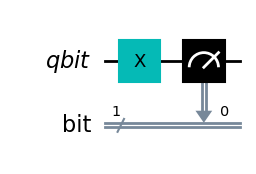

OPENQASM 2.0;
include "qelib1.inc";
qreg qbit[1];
creg bit[1];
x qbit[0];
measure qbit[0] -> bit[0];



In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram


############# CREATE #####################
qr = QuantumRegister(1, 'qbit')
cr = ClassicalRegister(1, 'bit')
qc = QuantumCircuit(qr, cr)

qc.x(0)
qc.measure(0, 0)

display(qc.draw(output='mpl'))
print(qc.qasm())

# Run the code on a real quantum computer
## IBMQ Backends

![](https://miro.medium.com/max/700/1*YuR-BtRRTxLQ5EXW8fbUEQ.png)

`Provider` - IBM Quantum Experience account provider. A server to ask about machines.

`Backend` - IBM Quantum Experience device. Quantum computer.

## Obtaining the token

Visit https://quantum-computing.ibm.com/account and get the key!

Visit https://quantum-computing.ibm.com/services?services=systems&systems=yours and choose a backend (1 bit is ok).

In [2]:
from qiskit import IBMQ, execute

In [3]:
token = open("../token.ibm").read()

In [ ]:
IBMQ.save_account(token)

In [6]:
IBMQ.load_account()

print("======== Provider list =======")
print(list(IBMQ.providers()))

provider = IBMQ.get_provider('ibm-q')
print("\n========== QPU list ==========")
print(*[
        (qpu.name(), qpu.configuration().n_qubits, qpu.status().pending_jobs) 
        for qpu in provider.backends()], sep="\n")

print("\n========== QPU info ==========")
machine = "ibmq_quito"               # try lima, belem, manila, quito 
qpu = provider.get_backend(machine) 

nq = qpu.configuration().n_qubits
my_limit = qpu.job_limit().maximum_jobs
my_jobs = qpu.job_limit().active_jobs

status = qpu.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Works = {is_operational}, Queue = {jobs_in_queue}, "
      f"My Job Limit = {my_jobs}/{my_limit}, Qubits = {nq}")

ibmqfactory.load_account:WARNING:2023-09-21 12:26:26,942: Credentials are already in use. The existing account in the session will be replaced.


======== Provider list =======
[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

========== QPU list ==========
('ibmq_qasm_simulator', 32, 0)
('ibmq_lima', 5, 12178)
('ibmq_belem', 5, 480)
('ibmq_quito', 5, 629)
('simulator_statevector', 32, 0)
('simulator_mps', 100, 0)
('simulator_extended_stabilizer', 63, 0)
('simulator_stabilizer', 5000, 0)
('ibmq_jakarta', 7, 946)
('ibmq_manila', 5, 4316)
('ibm_lagos', 7, 175)
('ibm_nairobi', 7, 698)
('ibm_perth', 7, 815)

========== QPU info ==========
Works = True, Queue = 629, My Job Limit = 0/3, Qubits = 5


In [7]:
qpu = provider.get_backend("ibmq_quito")
job = execute(qc, backend=qpu, shots=40)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


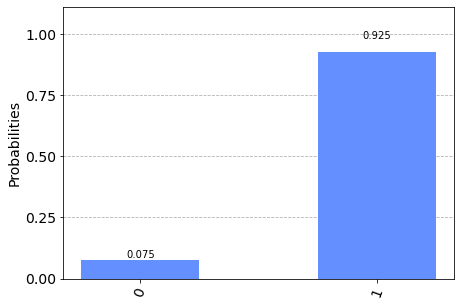

In [8]:
counts = job.result().get_counts()
plot_histogram(counts)